In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import fashion_mnist
from tensorflow.math import confusion_matrix

In [3]:
(X_train,Y_train), (X_test,Y_test) = fashion_mnist.load_data()

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

c:\Users\ANUSANTH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [7]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7671 - loss: 0.6845
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8561 - loss: 0.3978
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8699 - loss: 0.3547
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8785 - loss: 0.3302
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8837 - loss: 0.3136
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8888 - loss: 0.2995
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8934 - loss: 0.2873
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8960 - loss: 0.2784
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8979 - loss: 0.2705
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9019 - loss: 0.2614


In [8]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(f"Accuracy : {accuracy} | Loss : {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8790 - loss: 0.3529
Accuracy : 0.8773000240325928 | Loss : 0.35632845759391785


In [9]:
pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [10]:
y_pred_labels = [np.argmax(i) for i  in pred]

In [11]:
conf_mat = confusion_matrix(Y_test,y_pred_labels)

Text(0.5, 47.7222222222222, 'Predicted Labels')

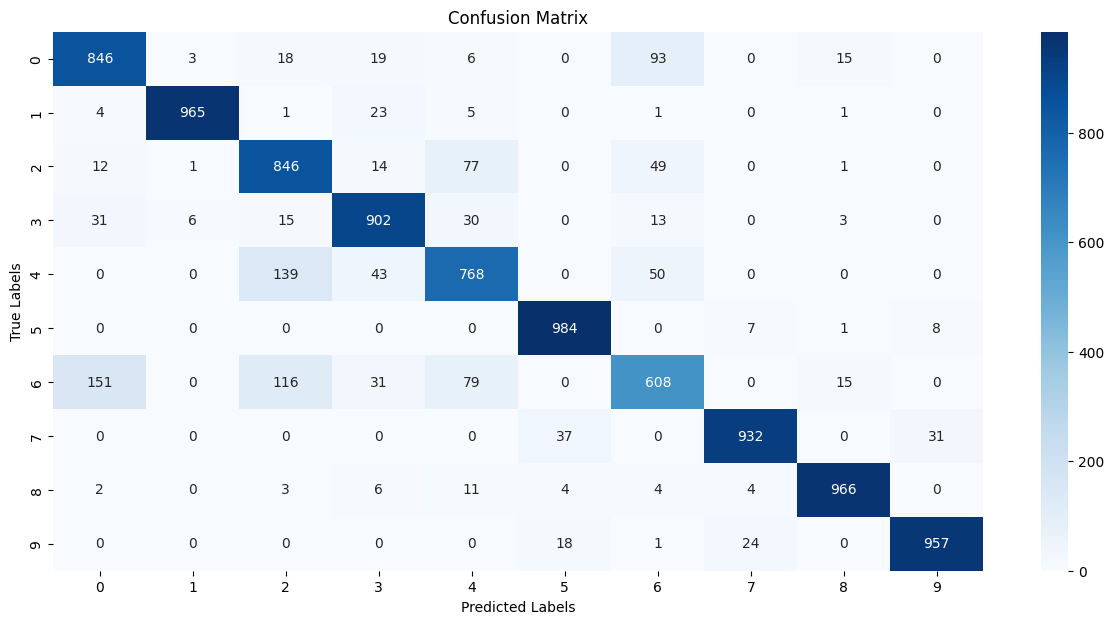

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
def preprocessImage(imgPath):
    img = cv.imread(imgPath, cv.IMREAD_GRAYSCALE)
    if img is None:
        print("Image not loaded. Check the path:", imgPath)
        return None
    # cv.imshow('Input Image Grayscaled', img)
    # cv.waitKey(0)
    imgResized = cv.resize(img, (28, 28))
    imgInverted = 255 - imgResized
    imgNormalized = imgInverted/ 255
    imgFinal = imgNormalized.reshape(1, 28, 28)
    return imgFinal

In [15]:
def predictImage(model,imgPath):
    imgArr = preprocessImage(imgPath)
    imgPred = model.predict(imgArr)
    imgPredClass = np.argmax(imgPred)
    confidence = np.max(imgPred)*100

    plt.imshow(imgArr[0], cmap='gray')
    plt.title(f"{class_names[imgPredClass]} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    print(f"Predicted: {class_names[imgPredClass]}")
    print(f"Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


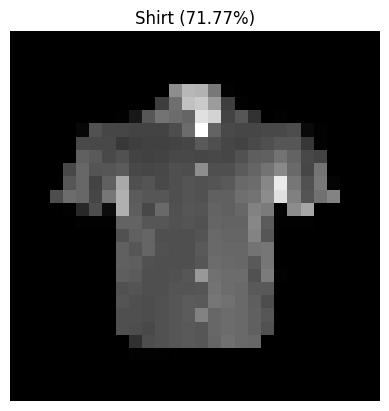

Predicted: Shirt
Confidence: 71.77%


In [47]:
#example usage
imgpath = r'custom_dataset\shirt1.jpg'
predictImage(model,imgpath)